In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
%matplotlib inline

In [2]:
L = 1
alpha = 0.5
dt = 0.001
dx = 0.01
x = np.arange(0, L, dx)
t = np.arange(0, 0.5, dt)

In [3]:
A = -2 * np.diag(np.ones([x.size]))
A += np.diag(np.ones([x.size - 1]), 1)
A += np.diag(np.ones([x.size - 1]), -1)
#A[0,:] = 0
#A[-1,:] = 0
A = alpha * A / dx**2
A

array([[-10000.,   5000.,      0., ...,      0.,      0.,      0.],
       [  5000., -10000.,   5000., ...,      0.,      0.,      0.],
       [     0.,   5000., -10000., ...,      0.,      0.,      0.],
       ...,
       [     0.,      0.,      0., ..., -10000.,   5000.,      0.],
       [     0.,      0.,      0., ...,   5000., -10000.,   5000.],
       [     0.,      0.,      0., ...,      0.,   5000., -10000.]])

In [4]:
def heat(u, t):
  return (A @ u.reshape(-1, 1)).flatten()

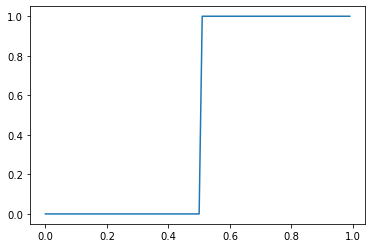

In [5]:
u0 = np.ones_like(x) * x > 0.5
plt.plot(x, u0)

In [6]:
heat(u0, 0)

array([    0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,  5000., -5000.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0., -5000.])

In [7]:
u = odeint(heat, u0, t)

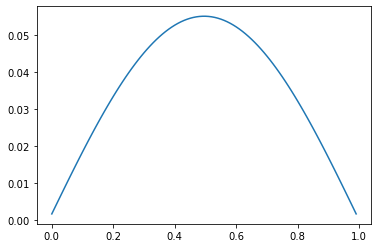

In [8]:
plt.plot(x, u[-1, :])

In [9]:
from matplotlib.animation import FuncAnimation
from IPython import display

def animate(x, u, interval=20, ylim=None):
  fig, ax = plt.subplots(figsize=(7,3))

  line, = ax.plot([])

  ax.set_xlim(x.min(), x.max())
  if ylim is None:
    ax.set_ylim(u.min(), u.max())
  else:
    ax.set_ylim(ylim)

  anim = FuncAnimation(
    fig,
    lambda frame: line.set_data((x, u[frame, :])),
    frames=u.shape[0],
    interval=interval
  )

  video = anim.to_html5_video()
  html = display.HTML(video)
  display.display(html)
  plt.close()

In [10]:
animate(x, u, 20)

In [11]:
An = np.array(A)
An[0,:] = An[1,:]
An[-1,:] = An[-2,:]
An

array([[  5000., -10000.,   5000., ...,      0.,      0.,      0.],
       [  5000., -10000.,   5000., ...,      0.,      0.,      0.],
       [     0.,   5000., -10000., ...,      0.,      0.,      0.],
       ...,
       [     0.,      0.,      0., ..., -10000.,   5000.,      0.],
       [     0.,      0.,      0., ...,   5000., -10000.,   5000.],
       [     0.,      0.,      0., ...,   5000., -10000.,   5000.]])

In [12]:
def heat_neumann(u, t):
  u[0] = u[1]
  u[-1] = u[-2]
  return (An @ u.reshape(-1, 1)).flatten()

In [13]:
u = odeint(heat_neumann, u0, t)

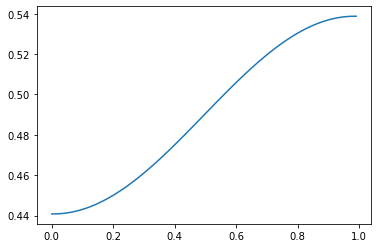

In [14]:
plt.plot(x, u[-1,:])

In [15]:
animate(x, u,)

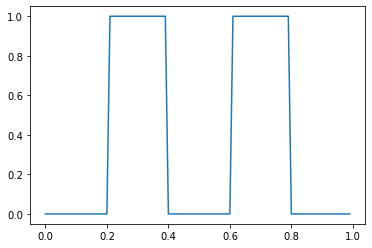

In [16]:
u0_2 = np.ones_like(x) * ((x * 5 * L) % 2 > 1)
plt.plot(x, u0_2)

In [17]:
u = odeint(heat_neumann, u0_2, t)
animate(x, u)

In [18]:
u = odeint(heat, u0_2, t)
animate(x, u)

In [19]:
def heat_t(u, t):
  u[0] = u[1]
  u[-1] = np.sin(8 * np.pi * t)
  return (An @ u.reshape(-1, 1)).flatten()

In [20]:
u0_t = np.zeros_like(x)

In [21]:
u = odeint(heat_t, u0_t, t)

In [22]:
animate(x, u)